<html> <h1 style="font-style:bold; color:black;"> Machine Learning in Finance Coursework </h1> </html>

<html> <h1 style="font-style:italic; color:black;"> Fraud Detection </h1> </html>

Dataset: https://www.kaggle.com/datasets/ealaxi/paysim1/data

In [1]:
#Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

C:\Users\elado\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [42]:
#Importing libraries from sklearn

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
#Importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras

In [4]:
print(tf.__version__)

2.17.0


In [5]:
#Importing libraries for early stopping and model checkpoint

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [6]:
#random - create random beginning values for neural network cells
#seed - initialises a random number generator for result repeatability

np.random.seed(42)

In [7]:
#Read data from csv file

df = pd.read_csv('fraud_detection_dataset.csv')

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Exploratory Data Analysis, Preprocessing and Data Visualisation

In [10]:
#Checking if there is any null (NaN) value inside data

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
#Checking if there is any duplicate entries in data

df.duplicated().sum()

0

In [12]:
#Sampling the dataset - because it is too big (> 6 million rows)

sample_df = df.sample(n = 100000, random_state = 21).reset_index(drop = True)

In [13]:
sample_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,380,CASH_OUT,226443.22,C848489602,0.00,0.00,C1669106298,1079964.87,1306408.09,0,0
1,299,CASH_IN,29376.26,C1321299094,5487174.78,5516551.04,C1883468072,392193.08,362816.82,0,0
2,10,TRANSFER,382833.44,C592591740,0.00,0.00,C1121863378,850265.20,1104868.39,0,0
3,375,CASH_OUT,344761.46,C579717468,0.00,0.00,C1992785657,386057.90,730819.36,0,0
4,20,PAYMENT,17791.50,C896721196,0.00,0.00,M491240909,0.00,0.00,0,0


In [14]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [15]:
# Counting the number of entries for fraud and not fraud
# 0 - not fraud
# 1 - fraud

value_counts = sample_df['isFraud'].value_counts()
print(value_counts)

0    99862
1      138
Name: isFraud, dtype: int64


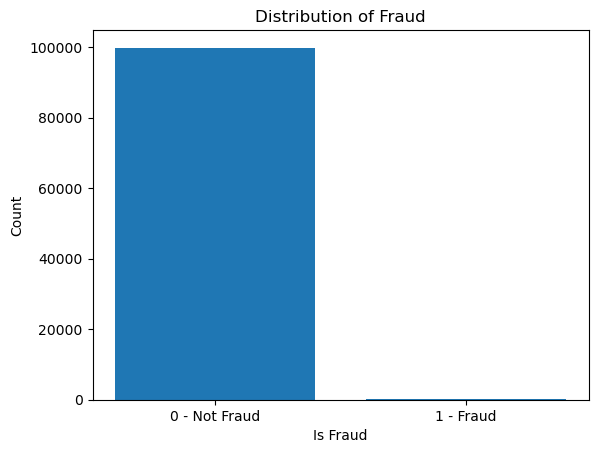

In [18]:
# Bar chart of values of isFraud column 

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.title('Distribution of Fraud')
plt.xticks(value_counts.index, ['0 - Not Fraud', '1 - Fraud'])
plt.show()

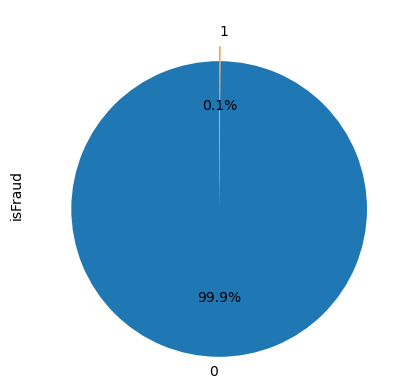

In [19]:
# Pie chart of values of isFraud column 

sample_df['isFraud'].value_counts(sort=False).plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.1, 0])
plt.show()

In [20]:
# Finding how many unique values are there for each column

sample_df.nunique()

step                473
type                  5
amount            99599
nameOrig          99997
oldbalanceOrg     54192
newbalanceOrig    43388
nameDest          92824
oldbalanceDest    57363
newbalanceDest    61386
isFraud               2
isFlaggedFraud        1
dtype: int64

In [21]:
# Finding difference between old balance and new balance of the account that does the transaction

sample_df['diffBalanceOrig'] = abs(sample_df['oldbalanceOrg'] - sample_df['newbalanceOrig'])

In [22]:
# Finding difference between old balance and new balance of the account that takes the transaction

sample_df['diffBalanceDest'] = abs(sample_df['oldbalanceDest'] - sample_df['newbalanceDest'])

In [23]:
sample_df.head(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffBalanceOrig,diffBalanceDest
0,380,CASH_OUT,226443.22,C848489602,0.00,0.00,C1669106298,1079964.87,1306408.09,0,0,0.00,226443.22
1,299,CASH_IN,29376.26,C1321299094,5487174.78,5516551.04,C1883468072,392193.08,362816.82,0,0,29376.26,29376.26
2,10,TRANSFER,382833.44,C592591740,0.00,0.00,C1121863378,850265.20,1104868.39,0,0,0.00,254603.19
3,375,CASH_OUT,344761.46,C579717468,0.00,0.00,C1992785657,386057.90,730819.36,0,0,0.00,344761.46
4,20,PAYMENT,17791.50,C896721196,0.00,0.00,M491240909,0.00,0.00,0,0,0.00,0.00
5,189,TRANSFER,275040.71,C655980579,4013.00,0.00,C263183240,948715.26,1223755.97,0,0,4013.00,275040.71


In [24]:
# Entries that has isFlaggedFraud as 1

sample_df[(sample_df['isFlaggedFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffBalanceOrig,diffBalanceDest


In [25]:
# For this analysis,

# isFlaggedFraud (in sample data, always 0)
# nameOrig (name is nearly always unique in data as well as being categorical)
# nameDest (name is nearly always unique in data as well as being categorical)

# columns can be disregarded.

sample_df = sample_df.drop(columns=['isFlaggedFraud', 'nameOrig', 'nameDest'])

In [26]:
sample_df.head(6)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
0,380,CASH_OUT,226443.22,0.00,0.00,1079964.87,1306408.09,0,0.00,226443.22
1,299,CASH_IN,29376.26,5487174.78,5516551.04,392193.08,362816.82,0,29376.26,29376.26
2,10,TRANSFER,382833.44,0.00,0.00,850265.20,1104868.39,0,0.00,254603.19
3,375,CASH_OUT,344761.46,0.00,0.00,386057.90,730819.36,0,0.00,344761.46
4,20,PAYMENT,17791.50,0.00,0.00,0.00,0.00,0,0.00,0.00
5,189,TRANSFER,275040.71,4013.00,0.00,948715.26,1223755.97,0,4013.00,275040.71


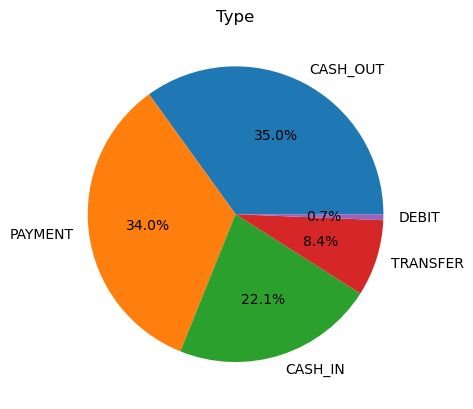

In [28]:
#Generating pie charts for categorical column - type

value_counts = sample_df['type'].value_counts()
plt.pie(x=value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title("Type")
plt.show()

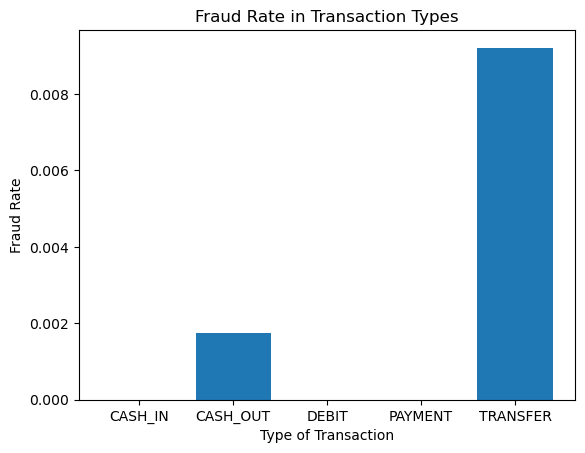

In [43]:
# Calculate the fraud according to each transaction type and plot this

fraud_by_type = sample_df.groupby('type')['isFraud'].mean()

plt.bar(fraud_by_type.index, fraud_by_type)
plt.xlabel('Type of Transaction')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate in Transaction Types')
plt.show()

In [46]:
# Applying one-hot encoding to type column

sample_df = pd.get_dummies(sample_df, columns=['type'])

In [47]:
sample_df.head(6)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,380,226443.22,0.00,0.00,1079964.87,1306408.09,0,0.00,226443.22,0,1,0,0,0
1,299,29376.26,5487174.78,5516551.04,392193.08,362816.82,0,29376.26,29376.26,1,0,0,0,0
2,10,382833.44,0.00,0.00,850265.20,1104868.39,0,0.00,254603.19,0,0,0,0,1
3,375,344761.46,0.00,0.00,386057.90,730819.36,0,0.00,344761.46,0,1,0,0,0
4,20,17791.50,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,1,0
5,189,275040.71,4013.00,0.00,948715.26,1223755.97,0,4013.00,275040.71,0,0,0,0,1


In [48]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   step             100000 non-null  int64  
 1   amount           100000 non-null  float64
 2   oldbalanceOrg    100000 non-null  float64
 3   newbalanceOrig   100000 non-null  float64
 4   oldbalanceDest   100000 non-null  float64
 5   newbalanceDest   100000 non-null  float64
 6   isFraud          100000 non-null  int64  
 7   diffBalanceOrig  100000 non-null  float64
 8   diffBalanceDest  100000 non-null  float64
 9   type_CASH_IN     100000 non-null  uint8  
 10  type_CASH_OUT    100000 non-null  uint8  
 11  type_DEBIT       100000 non-null  uint8  
 12  type_PAYMENT     100000 non-null  uint8  
 13  type_TRANSFER    100000 non-null  uint8  
dtypes: float64(7), int64(2), uint8(5)
memory usage: 7.3 MB


In [56]:
sample_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,243.285740,1.793632e+05,8.251654e+05,8.467653e+05,1.097587e+06,1.220050e+06,0.001380,5.327797e+04,1.846556e+05,0.220780,0.349500,0.006500,0.339610,0.083610
std,142.222445,6.424071e+05,2.872896e+06,2.908103e+06,3.337670e+06,3.652883e+06,0.037123,1.367257e+05,7.970376e+05,0.414775,0.476814,0.080361,0.473579,0.276803
min,1.000000,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,155.000000,1.345219e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,239.000000,7.527372e+04,1.437700e+04,0.000000e+00,1.297910e+05,2.137578e+05,0.000000,7.443255e+03,6.290975e+04,0.000000,0.000000,0.000000,0.000000,0.000000
75%,335.000000,2.084583e+05,1.070800e+05,1.443359e+05,9.333796e+05,1.105028e+06,0.000000,5.190099e+04,2.044557e+05,0.000000,1.000000,0.000000,1.000000,0.000000
max,742.000000,5.894475e+07,3.489219e+07,3.472090e+07,2.629401e+08,3.114049e+08,1.000000,1.000000e+07,5.894475e+07,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#Generating heat map
#First, correlation is calculated.

correlation_credit_risk = sample_df.corr()
correlation_credit_risk

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,0.019905,-0.010091,-0.010400,0.028184,0.026048,0.034581,0.006067,-0.000441,0.002435,-0.010807,0.003637,0.003849,0.007325
amount,0.019905,1.000000,-0.001362,-0.005899,0.358487,0.520453,0.066054,0.168293,0.892850,-0.008093,-0.003846,-0.021890,-0.185672,0.342771
oldbalanceOrg,-0.010091,-0.001362,1.000000,0.998813,0.061208,0.036497,0.010273,0.251260,-0.002884,0.502444,-0.199165,-0.021337,-0.188798,-0.080602
newbalanceOrig,-0.010400,-0.005899,0.998813,1.000000,0.062835,0.036563,-0.007012,0.240727,-0.004402,0.523447,-0.209256,-0.021783,-0.193426,-0.086643
oldbalanceDest,0.028184,0.358487,0.061208,0.062835,1.000000,0.977239,-0.006809,0.052204,0.314096,0.074531,0.089292,0.009682,-0.235824,0.135165
newbalanceDest,0.026048,0.520453,0.036497,0.036563,0.977239,1.000000,-0.002077,0.036127,0.503446,0.032944,0.095273,0.006824,-0.239516,0.194324
isFraud,0.034581,0.066054,0.010273,-0.007012,-0.006809,-0.002077,1.000000,0.344637,0.016095,-0.019787,0.007214,-0.003007,-0.026658,0.063706
diffBalanceOrig,0.006067,0.168293,0.251260,0.240727,0.052204,0.036127,0.344637,1.000000,0.058142,0.452766,-0.135520,-0.029316,-0.245667,-0.016183
diffBalanceDest,-0.000441,0.892850,-0.002884,-0.004402,0.314096,0.503446,0.016095,0.058142,1.000000,-0.020691,0.010337,-0.014828,-0.166141,0.301750
type_CASH_IN,0.002435,-0.008093,0.502444,0.523447,0.074531,0.032944,-0.019787,0.452766,-0.020691,1.000000,-0.390166,-0.043055,-0.381716,-0.160782


In [52]:
#Correlation values between columns and 'isFraud' column

corr_order = sample_df.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)
corr_order

,isFraud
isFraud,1.000000
diffBalanceOrig,0.344637
amount,0.066054
type_TRANSFER,0.063706
step,0.034581
diffBalanceDest,0.016095
oldbalanceOrg,0.010273
type_CASH_OUT,0.007214
newbalanceDest,-0.002077
type_DEBIT,-0.003007


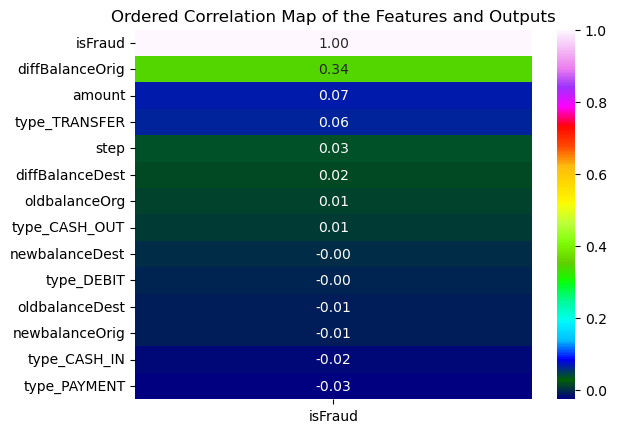

In [53]:
# Heat map for correlations with outputs

sns.heatmap(corr_order, annot=True, fmt='.2f', cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features and Outputs')
plt.show()

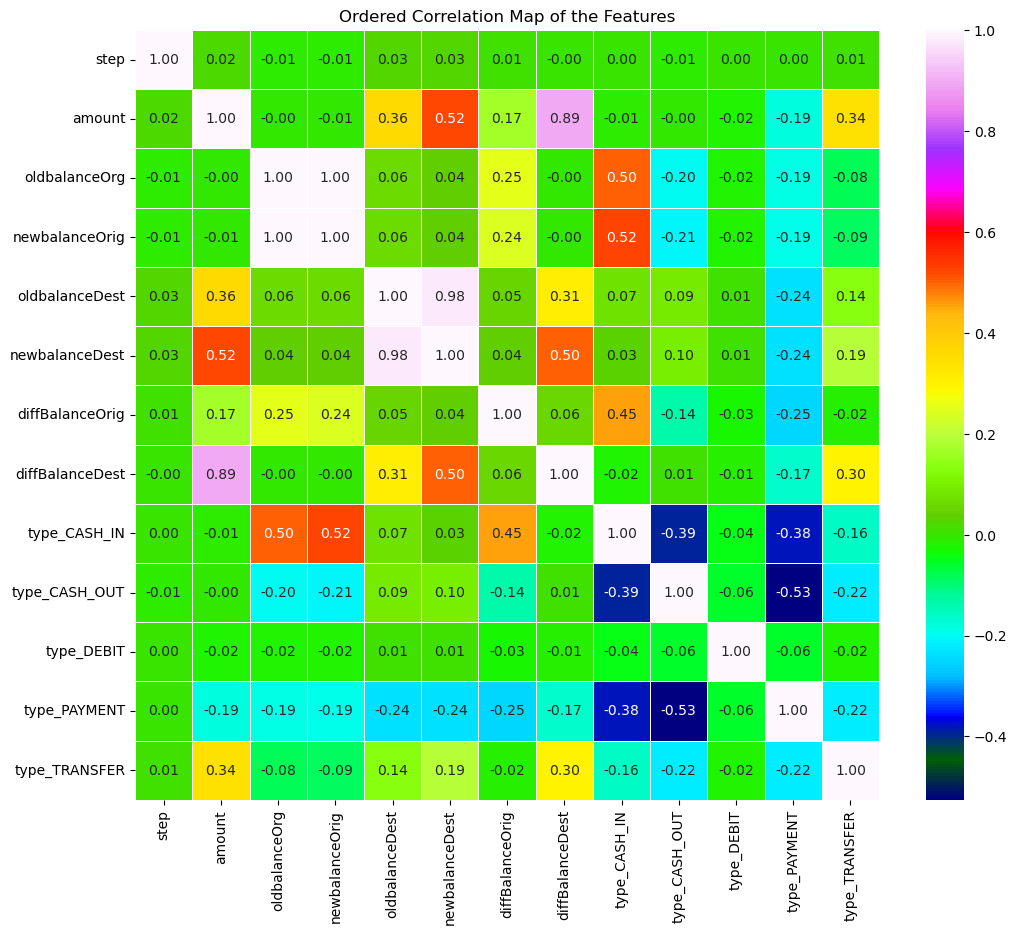

In [55]:
# Heat map for features without outputs

plt.figure(figsize=(12,10))
corr_order_without_target = sample_df.drop('isFraud', axis=1).corr()
sns.heatmap(corr_order_without_target, annot=True, fmt='.2f', annot_kws={"size": 10}, cbar=True, linewidths=0.5, cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features')
plt.show()

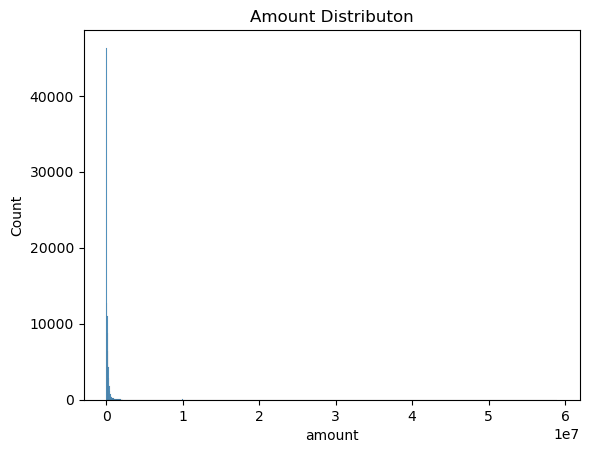

In [147]:
#Histogram of the column 'amount'

sns.histplot(data=sample_df, x='amount', bins=1000)
plt.title('Amount Distributon')
plt.show()

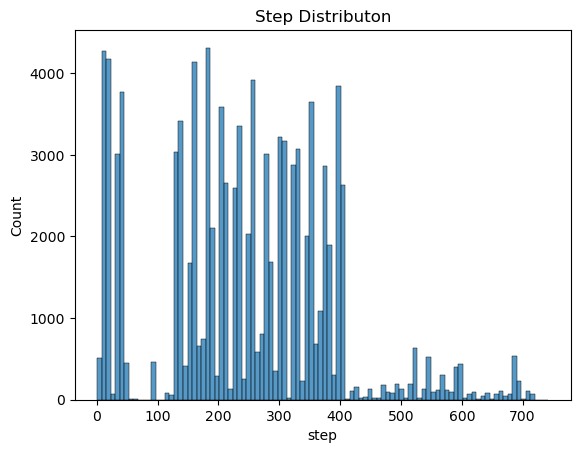

In [148]:
#Histogram of the column 'step'
#1 step is equal to 1 hour of time in this dataset

sns.histplot(data=sample_df, x='step', bins=100)
plt.title('Step Distributon')
plt.show()

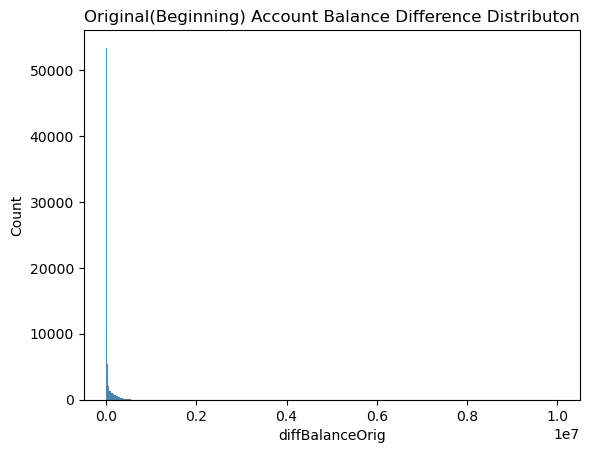

In [154]:
#Histogram of the column 'diffBalanceOrig'
#diffBalanceOrig = difference between old balance and new balance of the account that does the transaction

sns.histplot(data=sample_df, x='diffBalanceOrig', bins=1000)
plt.title('Original(Beginning) Account Balance Difference Distributon')
plt.show()

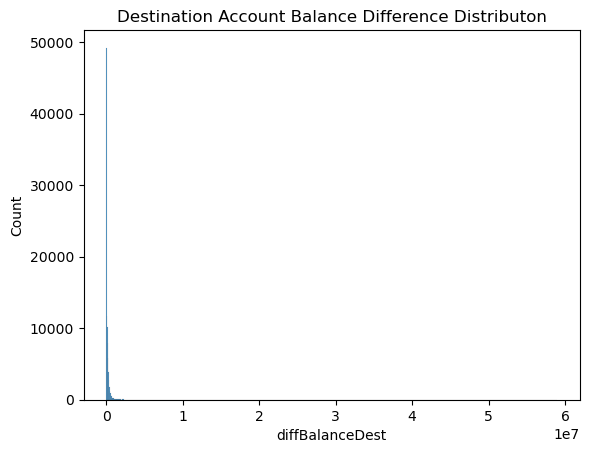

In [153]:
#Histogram of the column 'diffBalanceDest'
#diffBalanceDest = difference between old balance and new balance of the account that takes the transaction

sns.histplot(data=sample_df, x='diffBalanceDest', bins=1000)
plt.title('Destination Account Balance Difference Distributon')
plt.show()

C:\Users\elado\AppData\Local\Temp\ipykernel_14600\3943639.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='diffBalanceOrig', data=sample_df, palette='Set1');


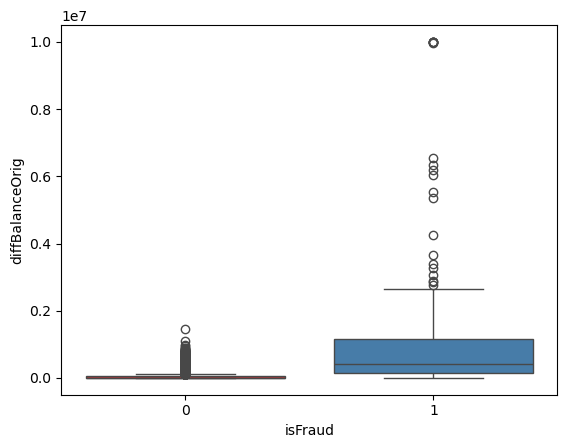

In [162]:
#Box plot of the 'diffBalanceOrig' column according to 'isFraud'

sns.boxplot(x='isFraud', y='diffBalanceOrig', data=sample_df, palette='Set1');

C:\Users\elado\AppData\Local\Temp\ipykernel_14600\406998737.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='diffBalanceDest', data=sample_df, palette='Set1');


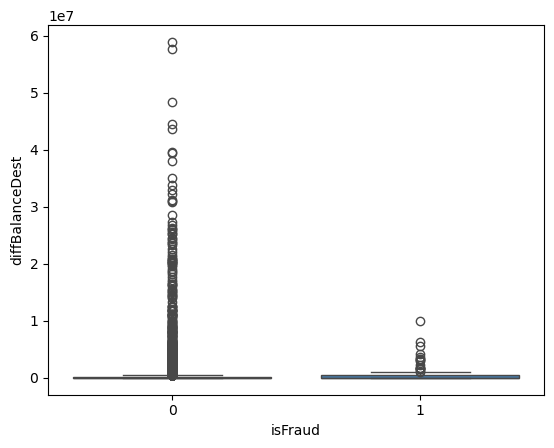

In [161]:
#Box plot of the 'diffBalanceDest' column according to 'isFraud'

sns.boxplot(x='isFraud', y='diffBalanceDest', data=sample_df, palette='Set1');

C:\Users\elado\AppData\Local\Temp\ipykernel_14600\3723004388.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='step', data=sample_df, palette='Set1');


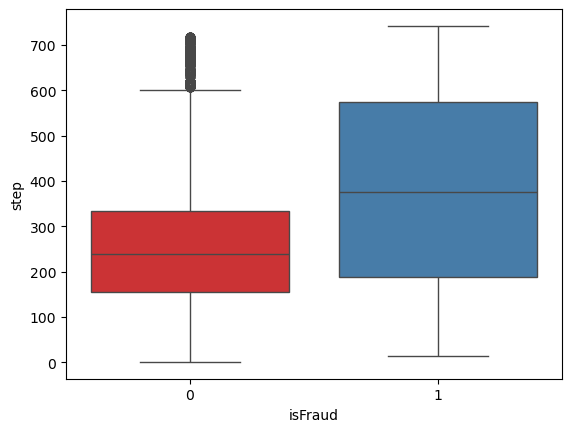

In [167]:
#Box plot of the 'step' column according to 'isFraud'

sns.boxplot(x='isFraud', y='step', data=sample_df, palette='Set1');

C:\Users\elado\AppData\Local\Temp\ipykernel_14600\469025475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=sample_df, palette='Set1');


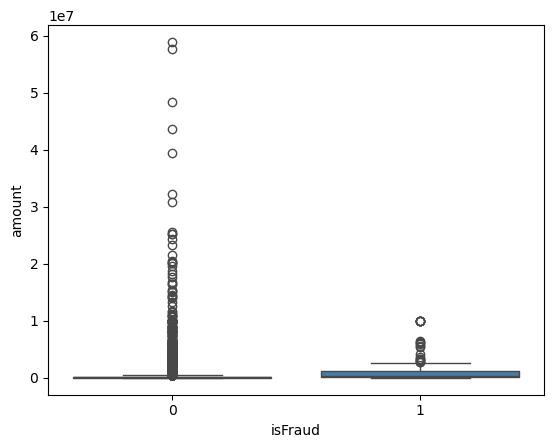

In [168]:
#Box plot of the 'amount' column according to 'isFraud'

sns.boxplot(x='isFraud', y='amount', data=sample_df, palette='Set1');

C:\Users\elado\AppData\Local\Temp\ipykernel_14600\1322565724.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='oldbalanceDest', data=sample_df, palette='Set1');


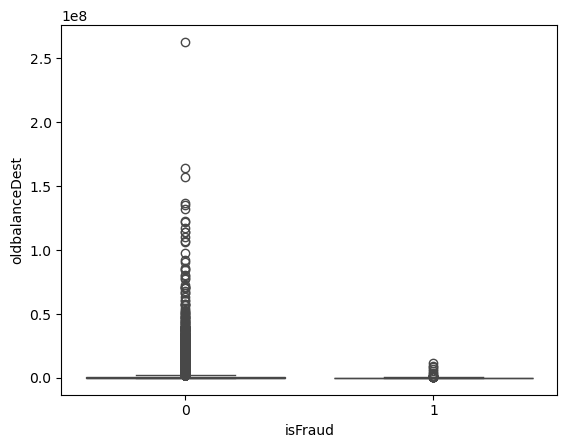

In [171]:
#Box plot of the 'oldBalanceDest' column according to 'isFraud'

sns.boxplot(x='isFraud', y='oldbalanceDest', data=sample_df, palette='Set1');

C:\Users\elado\AppData\Local\Temp\ipykernel_14600\3408960459.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='oldbalanceOrg', data=sample_df, palette='Set1');


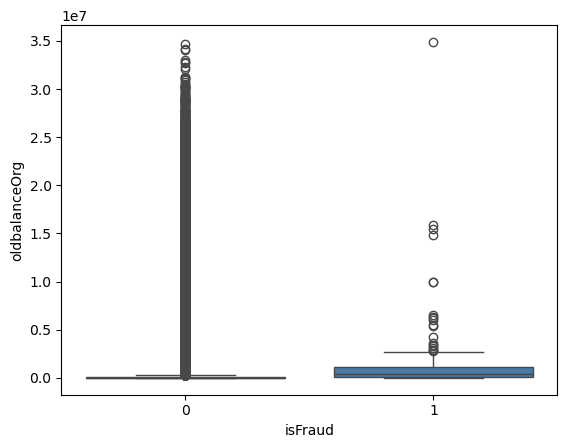

In [173]:
#Box plot of the 'oldBalanceOrg' column according to 'isFraud'

sns.boxplot(x='isFraud', y='oldbalanceOrg', data=sample_df, palette='Set1');

C:\Users\elado\AppData\Local\Temp\ipykernel_14600\840749303.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='newbalanceDest', data=sample_df, palette='Set1');


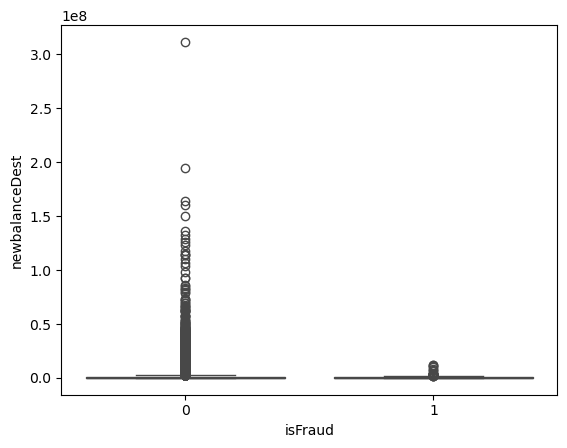

In [174]:
#Box plot of the 'newBalanceDest' column according to 'isFraud'

sns.boxplot(x='isFraud', y='newbalanceDest', data=sample_df, palette='Set1');

C:\Users\elado\AppData\Local\Temp\ipykernel_14600\990884025.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='newbalanceOrig', data=sample_df, palette='Set1');


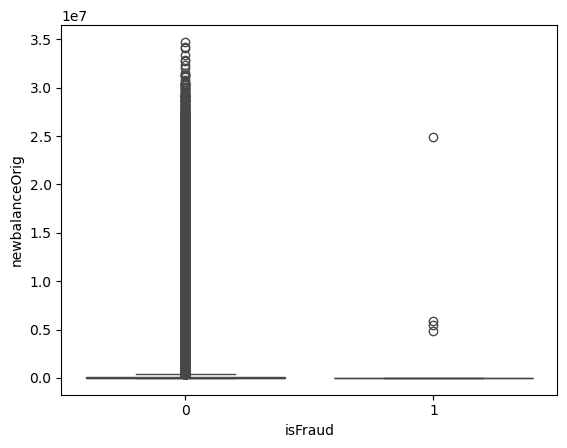

In [175]:
#Box plot of the 'newBalanceOrig' column according to 'isFraud'

sns.boxplot(x='isFraud', y='newbalanceOrig', data=sample_df, palette='Set1');

In [181]:
#isFraud data distribution in 'type_CASH_IN' column

pd.crosstab(sample_df['isFraud'], sample_df['type_CASH_IN'])

type_CASH_IN,0,1
isFraud,,
0,77784,22078
1,138,0


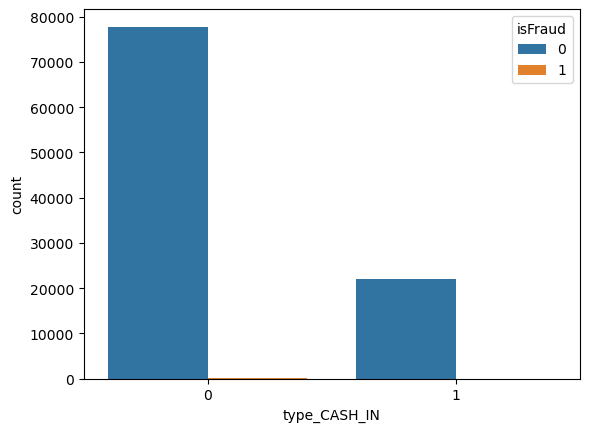

In [176]:
# Graph of isFraud data distribution in 'type_CASH_IN' column

sns.countplot(x='type_CASH_IN', hue='isFraud', data=sample_df);

In [182]:
#isFraud data distribution in 'type_CASH_OUT' column

pd.crosstab(sample_df['isFraud'], sample_df['type_CASH_OUT'])

type_CASH_OUT,0,1
isFraud,,
0,64973,34889
1,77,61


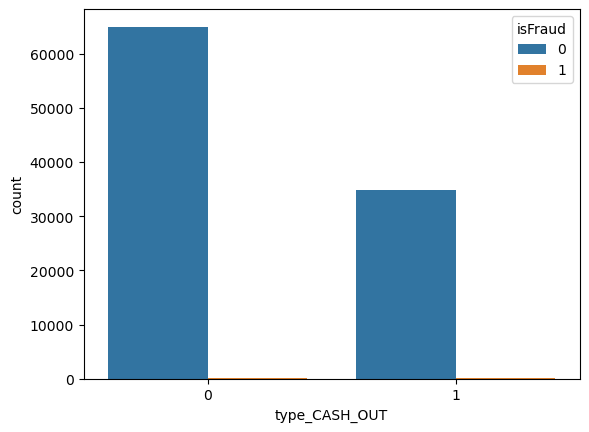

In [177]:
#Graph of isFraud data distribution in 'type_CASH_OUT' column

sns.countplot(x='type_CASH_OUT', hue='isFraud', data=sample_df);

In [183]:
#isFraud data distribution in 'type_DEBIT' column

pd.crosstab(sample_df['isFraud'], sample_df['type_DEBIT'])

type_DEBIT,0,1
isFraud,,
0,99212,650
1,138,0


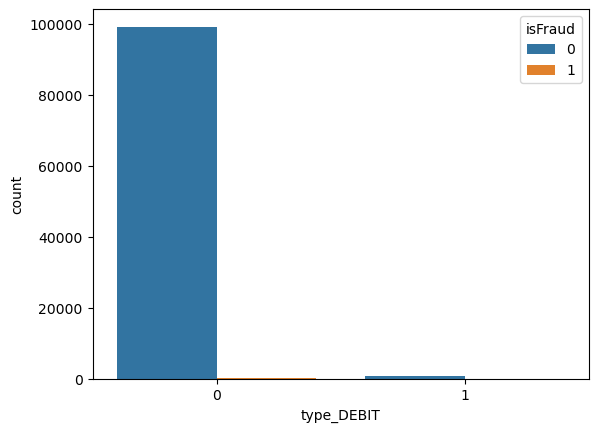

In [178]:
#Graph of isFraud data distribution in 'type_DEBIT' column

sns.countplot(x='type_DEBIT', hue='isFraud', data=sample_df);

In [184]:
#isFraud data distribution in 'type_PAYMENT' column

pd.crosstab(sample_df['isFraud'], sample_df['type_PAYMENT'])

type_PAYMENT,0,1
isFraud,,
0,65901,33961
1,138,0


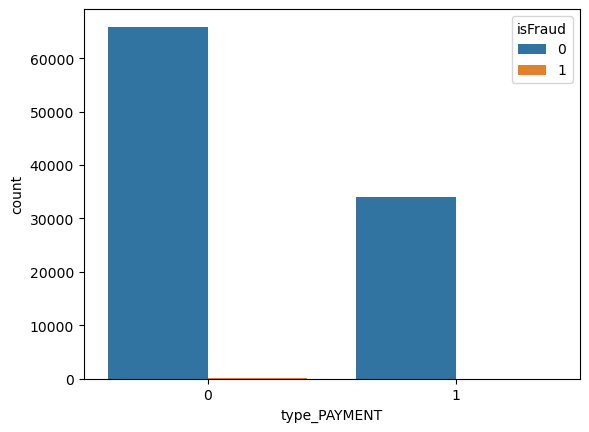

In [179]:
#Graph of isFraud data distribution in 'type_PAYMENT' column

sns.countplot(x='type_PAYMENT', hue='isFraud', data=sample_df);

In [185]:
#isFraud data distribution in 'type_TRANSFER' column

pd.crosstab(sample_df['isFraud'], sample_df['type_TRANSFER'])

type_TRANSFER,0,1
isFraud,,
0,91578,8284
1,61,77


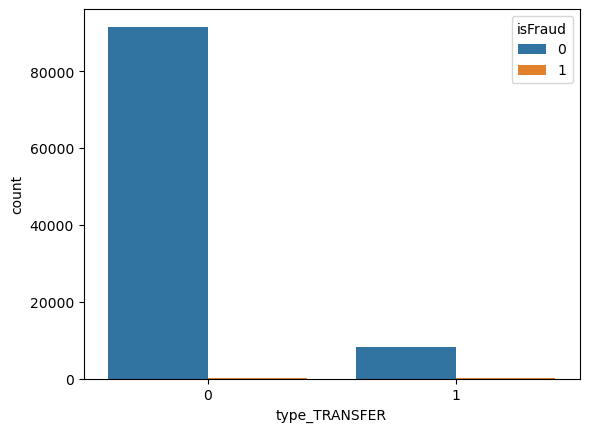

In [180]:
#Graph of isFraud data distribution in 'type_TRANSFER' column

sns.countplot(x='type_TRANSFER', hue='isFraud', data=sample_df);

#### Splitting the datasets into training and testing sets

In [71]:
#Get X(features) and y(label) from data

X = sample_df.drop(columns=['isFraud'])
y = sample_df['isFraud']

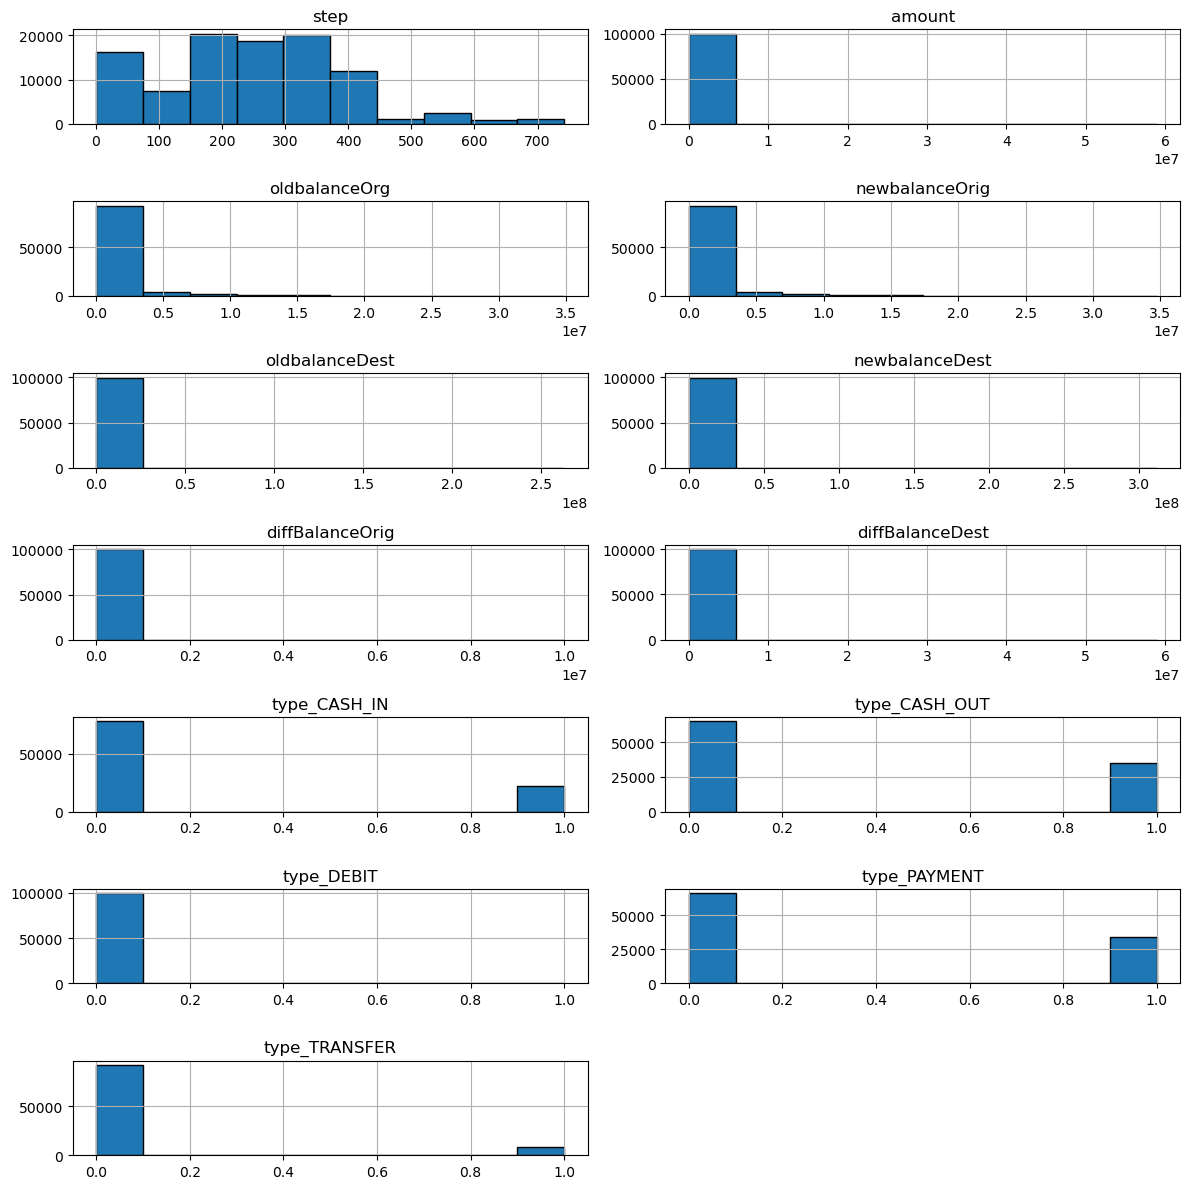

In [74]:
#Bar charts of distribution of the features

X.hist(layout=(7,2), figsize=(12,12), edgecolor='black')
plt.tight_layout()
plt.show()

In [75]:
#Separate data to train and test
#test is 20% of the data (0.2)
#train is 80% of the data (0.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
#Scaling features to ensure standardized values
#Changing the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform (X_test)

In [77]:
#To get a balanced training data, SMOTE is used. This process applied only to training data.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [79]:
#Count the occurrences of each class

count_result = y_train_smote.value_counts() 
print(count_result)

0    79889
1    79889
Name: isFraud, dtype: int64


In [80]:
#Get the shape of X_train

X_train_smote.shape

(159778, 13)

### Train the models

#### MLP (Multi Layer Perceptron)

In [81]:
#Create an MLP model

model_mlp = keras.Sequential([
    
    keras.layers.Dense(512, input_shape=(13,), activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(256, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(128, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(1, activation='sigmoid')
])

print(model_mlp.summary())

C:\Users\elado\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,521 (670.00 KB)

 Trainable params: 171,521 (670.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [82]:
#Arranging hyperparameters for the model
#loss = 'binary_crossentropy', because it is a two-class classification problem

model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
#Arranging model checkpoint parameters

mc_mlp = ModelCheckpoint('best_model_MLP.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [84]:
#Arranging early stopping parameters

es_mlp = EarlyStopping(monitor='val_loss', mode='min', patience=15, restore_best_weights=True, verbose=1)

In [86]:
#In model - patience:15, epochs:30, batch_size:50, validation_split:0.2

history_mlp = model_mlp.fit(X_train_smote, y_train_smote, batch_size=50,
                   epochs=30,
                   validation_split=0.2, shuffle=True,
                   verbose=1, callbacks=[es_mlp,mc_mlp])

Epoch 1/30
2551/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9769 - loss: 0.0632
Epoch 1: val_loss improved from inf to 0.01054, saving model to best_model_MLP.keras
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9769 - loss: 0.0631 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 2/30
2545/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9927 - loss: 0.0219
Epoch 2: val_loss improved from 0.01054 to 0.00828, saving model to best_model_MLP.keras
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9927 - loss: 0.0219 - val_accuracy: 0.9998 - val_loss: 0.0083
Epoch 3/30
2547/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9945 - loss: 0.0175
Epoch 3: val_loss did not improve from 0.00828
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9945 - loss: 0.0175 - val_accuracy: 0.9989 - val_loss: 0.0170
Epoch 4/30
2556/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9956 - loss: 0.0140
Epoch 4: val_loss improved from 0.00828 to 0.00785, saving model to

Epoch 26/30
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9984 - loss: 0.0053
Epoch 26: val_loss did not improve from 0.00051
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9984 - loss: 0.0053 - val_accuracy: 0.9952 - val_loss: 0.0152
Epoch 27/30
2556/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9984 - loss: 0.0055
Epoch 27: val_loss did not improve from 0.00051
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9984 - loss: 0.0055 - val_accuracy: 0.9999 - val_loss: 0.0041
Epoch 28/30
2553/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9986 - loss: 0.0051
Epoch 28: val_loss did not improve from 0.00051
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 8.2369e-04
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 13.


##### Evaluating Results for MLP

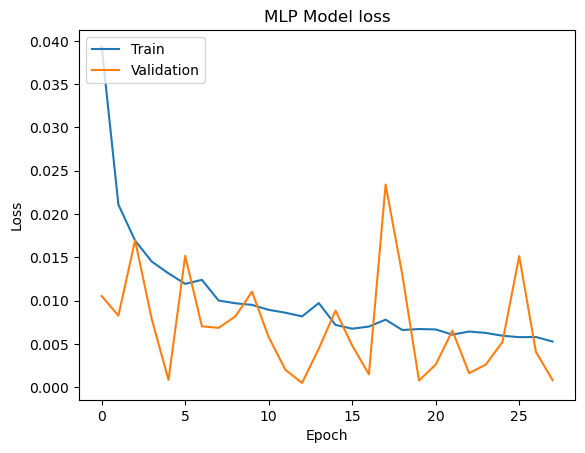

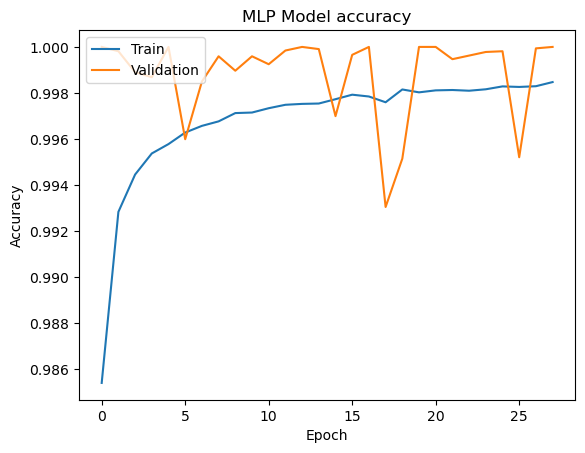

In [98]:
#Graphs of model loss and accuracy for both training and validation

plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('MLP Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('MLP Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [89]:
#Making prediction with MLP model

y_pred_MLP = (model_mlp.predict(X_test_scaled))

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [90]:
#Printing prediction values. Then, assign each prediction a label of 0 or 1.

print(y_pred_MLP[:10])
y_pred_MLP_labels = (y_pred_MLP >= 0.5).astype(int)

[[0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.7261803e-09]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [4.2382485e-13]]


MLP Dataset Results
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19973
           1       0.17      0.89      0.28        27

    accuracy                           0.99     20000
   macro avg       0.58      0.94      0.64     20000
weighted avg       1.00      0.99      1.00     20000



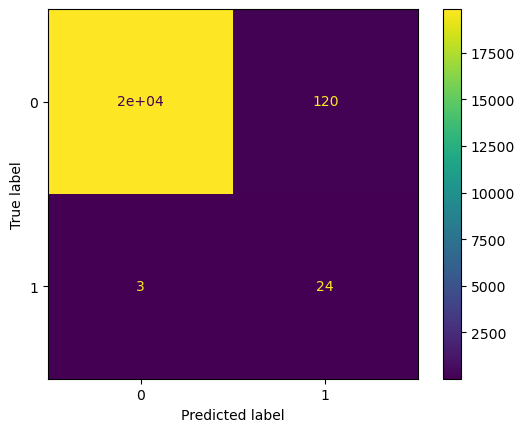

In [186]:
#Printing confusion matrix
print("MLP Dataset Results")
print(classification_report(y_test, y_pred_MLP_labels))

#Confusion matrix for MLP
cm = confusion_matrix(y_test, y_pred_MLP_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

#### CNN (Convolutional Neural Network)

In [93]:
#Create a CNN model

model_cnn = keras.Sequential([
    keras.layers.Conv1D(50, 9, padding='same', input_shape=(13,1), activation=tf.nn.relu, kernel_initializer="normal"),
    
    keras.layers.MaxPooling1D(7),
    
    keras.layers.Conv1D(100, 7, padding='same', activation='relu', kernel_initializer="normal"),
    
    keras.layers.GlobalMaxPooling1D(),
    
    keras.layers.Dense(25, activation='relu', kernel_initializer="normal"),
    
    keras.layers.Dense(1, activation='sigmoid')
])

print(model_cnn.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 13, 50)         │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 100)         │        35,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 100)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         2,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,151 (149.03 KB)

 Trainable params: 38,151 (149.03 KB)

 Non-trainable params: 0 (0.00 B)

None


In [94]:
#Arranging hyperparameters for the model

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
#Arranging model checkpoint parameters

mc_cnn = ModelCheckpoint('best_model_CNN.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [96]:
#Arranging early stopping parameters

es_cnn = EarlyStopping(monitor='val_loss', mode='min', patience=15, restore_best_weights=True, verbose=1)

In [97]:
#In model - patience:15, epochs:30, batch_size:50, validation_split:0.2

history_cnn = model_cnn.fit(X_train_smote, y_train_smote, batch_size=50,
                   epochs=30,
                   validation_split=0.2, shuffle=True,
                   verbose=1, callbacks=[es_cnn,mc_cnn])

Epoch 1/30
2551/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9302 - loss: 0.1792
Epoch 1: val_loss improved from inf to 0.04423, saving model to best_model_CNN.keras
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9303 - loss: 0.1790 - val_accuracy: 0.9846 - val_loss: 0.0442
Epoch 2/30
2552/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9758 - loss: 0.0684
Epoch 2: val_loss did not improve from 0.04423
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9758 - loss: 0.0684 - val_accuracy: 0.9837 - val_loss: 0.0511
Epoch 3/30
2553/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9797 - loss: 0.0546
Epoch 3: val_loss improved from 0.04423 to 0.04327, saving model to best_model_CNN.keras
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9797 - loss: 0.0546 - val_accuracy: 0.9841 - val_loss: 0.0433
Epoch 4/30
2551/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9818 - loss: 0.0505
Epoch 4: val_loss improved from 0.04327 to 0.04083, saving model to

##### Evaluating Results for CNN

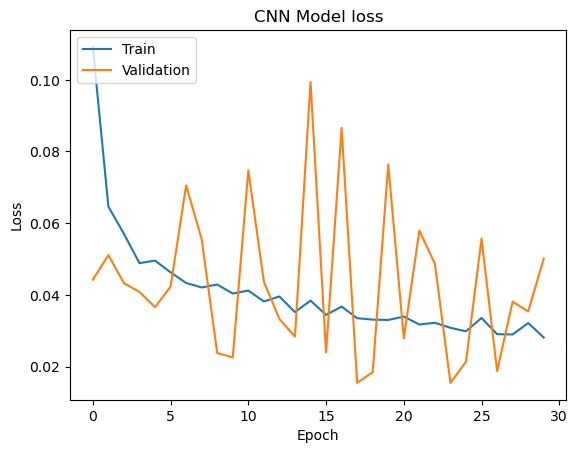

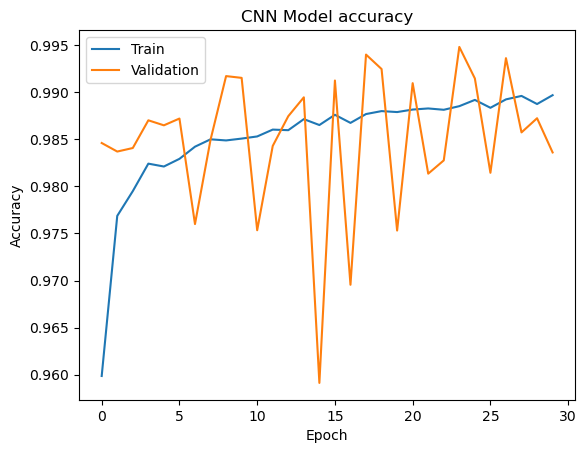

In [99]:
#Graphs of model loss and accuracy for both training and validation

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [100]:
#Making prediction with CNN model

y_pred_CNN = (model_cnn.predict(X_test_scaled))

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [101]:
#Printing prediction values. Then, assign each prediction a label of 0 or 1.

print(y_pred_CNN[:10])
y_pred_CNN_labels = (y_pred_CNN >= 0.5).astype(int)

[[6.9319655e-20]
 [9.8035378e-19]
 [4.9324904e-06]
 [2.0591523e-02]
 [0.0000000e+00]
 [1.0339135e-02]
 [6.1374631e-02]
 [4.1058817e-26]
 [4.6811369e-01]
 [7.2840048e-06]]


CNN Dataset Results
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19973
           1       0.07      0.85      0.12        27

    accuracy                           0.98     20000
   macro avg       0.53      0.92      0.56     20000
weighted avg       1.00      0.98      0.99     20000



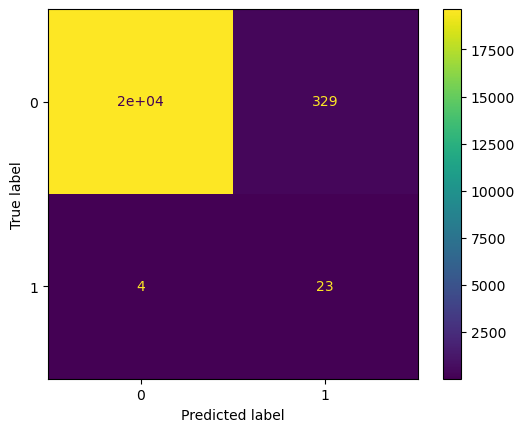

In [187]:
#Printing confusion matrix
print("CNN Dataset Results")
print(classification_report(y_test, y_pred_CNN_labels))

#Confusion matrix of CNN
cm = confusion_matrix(y_test, y_pred_CNN_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

#### LSTM (Long-Short Term Memory)

In [103]:
#Create an LSTM model

model_lstm = keras.Sequential([

    keras.layers.LSTM(100, activation='relu', input_shape=(13,1)),

    keras.layers.Dense(1, activation='sigmoid')
    
])

print(model_lstm.summary())

C:\Users\elado\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

None


In [104]:
#Arranging hyperparameters for the model

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
#Arranging model checkpoint parameters

mc_lstm = ModelCheckpoint('best_model_LSTM.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [106]:
#Arranging early stopping parameters

es_lstm = EarlyStopping(monitor='val_loss', mode='min', patience=15, restore_best_weights=True, verbose=1)

In [107]:
#In model - patience:15, epochs:30, batch_size:50, validation_split:0.2

history_lstm = model_lstm.fit(X_train_smote, y_train_smote, batch_size=50,
                   epochs=30,
                   validation_split=0.2, shuffle=True,
                   verbose=1, callbacks=[es_lstm,mc_lstm])

Epoch 1/30
2556/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8963 - loss: 0.2509
Epoch 1: val_loss improved from inf to 0.03740, saving model to best_model_LSTM.keras
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.8963 - loss: 0.2508 - val_accuracy: 0.9893 - val_loss: 0.0374
Epoch 2/30
2555/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9812 - loss: 0.0506
Epoch 2: val_loss improved from 0.03740 to 0.03274, saving model to best_model_LSTM.keras
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.9812 - loss: 0.0506 - val_accuracy: 0.9948 - val_loss: 0.0327
Epoch 3/30
2555/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9861 - loss: 0.0390
Epoch 3: val_loss improved from 0.03274 to 0.02642, saving model to best_model_LSTM.keras
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.9861 - loss: 0.0390 - val_accuracy: 0.9948 - val_loss: 0.0264
Epoch 4/30
2552/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9891 - loss: 0.0320
Epoch 4: val_lo

2557/2557 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.9971 - loss: 0.0097 - val_accuracy: 0.9985 - val_loss: 0.0066
Epoch 26/30
2556/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9973 - loss: 0.0087
Epoch 26: val_loss did not improve from 0.00151
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.9973 - loss: 0.0087 - val_accuracy: 0.9985 - val_loss: 0.0074
Epoch 27/30
2555/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9977 - loss: 0.0075
Epoch 27: val_loss did not improve from 0.00151
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 28/30
2555/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9975 - loss: 0.0078
Epoch 28: val_loss did not improve from 0.00151
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9975 - loss: 0.0078 - val_accuracy: 0.9993 - val_loss: 0.0086
Epoch 29/30
2556/2557 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9974 - loss: 0.0081
Epoch 29: val_l

##### Evaluating Results for LSTM

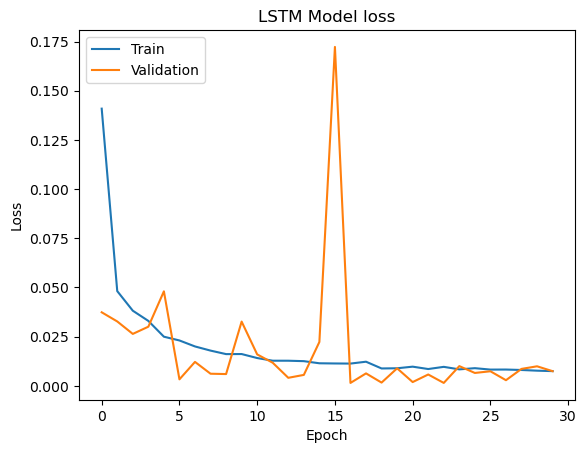

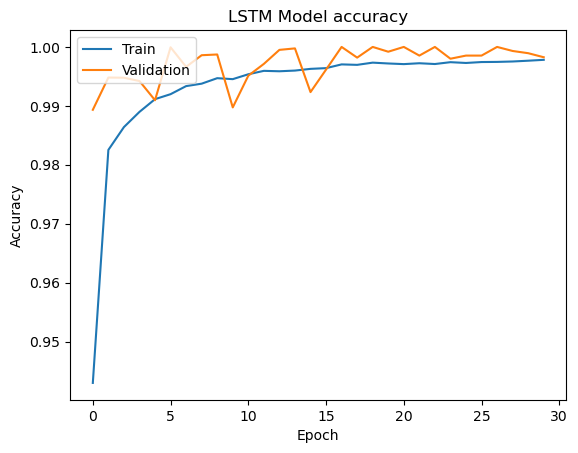

In [108]:
#Graphs of model loss and accuracy for both training and validation

plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [109]:
#Making prediction with LSTM model

y_pred_LSTM = (model_lstm.predict(X_test_scaled))

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [110]:
#Printing prediction values. Then, assign each prediction a label of 0 or 1.

print(y_pred_LSTM[:10])
y_pred_LSTM_labels = (y_pred_LSTM >= 0.5).astype(int)

[[6.1470360e-14]
 [4.6595847e-09]
 [1.5157132e-11]
 [5.1600243e-12]
 [1.6397369e-26]
 [4.3103018e-08]
 [4.2740013e-12]
 [3.0359433e-25]
 [2.2626259e-04]
 [1.1791137e-18]]


Imbalanced LSTM Dataset Results
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19973
           1       0.16      0.93      0.27        27

    accuracy                           0.99     20000
   macro avg       0.58      0.96      0.63     20000
weighted avg       1.00      0.99      1.00     20000



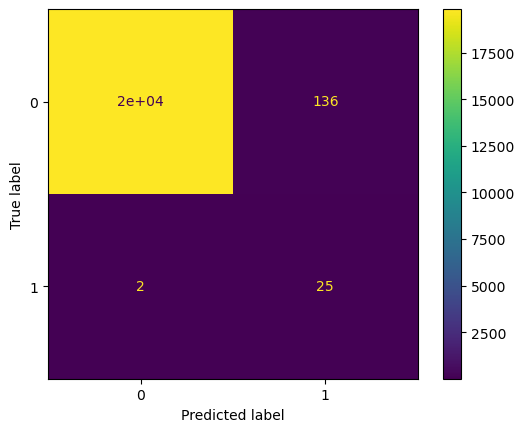

In [111]:
#Printing confusion matrix
print("LSTM Dataset Results")
print(classification_report(y_test, y_pred_LSTM_labels))

# Confusion matrix for LSTM
cm = confusion_matrix(y_test, y_pred_LSTM_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

#### Random Forest

In [112]:
#Create a Random Forest model to see the importances of featues

rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [113]:
#Get importance values for each feature

importances = rf.feature_importances_
feature_names = X.columns

In [114]:
#Sort feature importances in descending order
indices = np.argsort(importances)[::-1]


#Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature diffBalanceOrig (0.279818)
2. feature diffBalanceDest (0.193025)
3. feature newbalanceDest (0.138076)
4. feature oldbalanceOrg (0.093592)
5. feature amount (0.072887)
6. feature step (0.070912)
7. feature type_TRANSFER (0.040778)
8. feature oldbalanceDest (0.035372)
9. feature newbalanceOrig (0.034760)
10. feature type_CASH_OUT (0.022689)
11. feature type_CASH_IN (0.014248)
12. feature type_PAYMENT (0.003845)
13. feature type_DEBIT (0.000000)


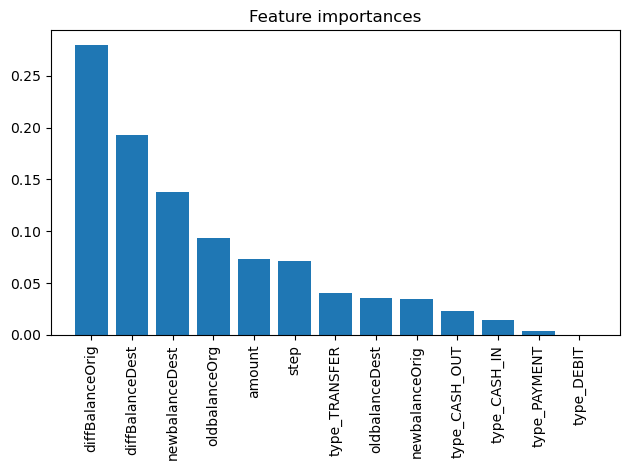

In [115]:
#Plot feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [116]:
#Create a Random Forest model to make predictions

new_random = RandomForestClassifier(n_estimators=500,
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=25,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                random_state=42)

new_random.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500, random_state=42)

In [117]:
#Making prediction with Random Forest model

y_pred_random = new_random.predict(X_test_scaled)

In [118]:
#Printing confusion matrix
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19973
           1       0.49      0.89      0.63        27

    accuracy                           1.00     20000
   macro avg       0.74      0.94      0.82     20000
weighted avg       1.00      1.00      1.00     20000



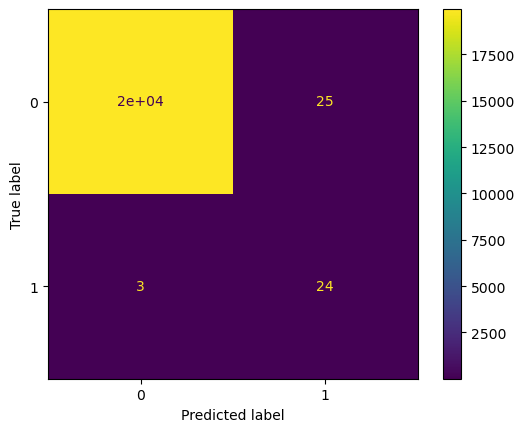

In [119]:
#Confusion matrix for Random Forest
cm_random = confusion_matrix(y_test, y_pred_random)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=[0, 1])
disp_rf.plot()
plt.show();

#### Support Vector Machine (SVM)

In [121]:
#Create an SVM model
from sklearn import svm
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', random_state = 42)
svm.fit(X_train_smote, y_train_smote)

SVC(kernel='linear', random_state=42)

In [122]:
#Making prediction with SVM model

y_pred_svm = svm.predict(X_test_scaled)

In [123]:
#Printing confusion matrix

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19973
           1       0.06      0.96      0.11        27

    accuracy                           0.98     20000
   macro avg       0.53      0.97      0.55     20000
weighted avg       1.00      0.98      0.99     20000



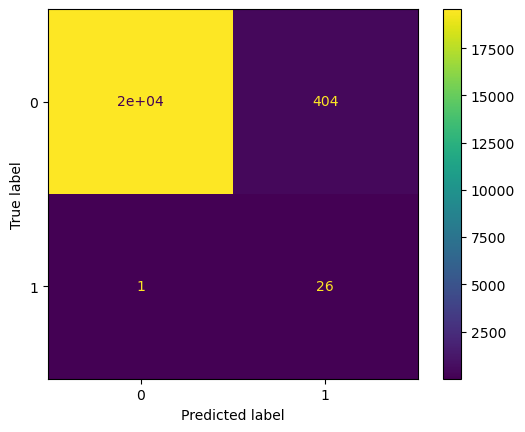

In [124]:
#Confusion matrix for SVM

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=[0, 1])
disp_svm.plot()
plt.show();

#### Decision Tree

In [126]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


#Create a Decision Tree model to see the importances of featues

dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [127]:
#Get importance values for each feature

importances = dt.feature_importances_
feature_names = X.columns

In [128]:
#Sort feature importances in descending order
indices = np.argsort(importances)[::-1]


#Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature diffBalanceDest (0.352447)
2. feature diffBalanceOrig (0.326364)
3. feature step (0.090295)
4. feature amount (0.062858)
5. feature type_CASH_OUT (0.043991)
6. feature oldbalanceOrg (0.042371)
7. feature oldbalanceDest (0.031888)
8. feature newbalanceOrig (0.022964)
9. feature type_CASH_IN (0.012900)
10. feature newbalanceDest (0.012272)
11. feature type_TRANSFER (0.001650)
12. feature type_PAYMENT (0.000000)
13. feature type_DEBIT (0.000000)


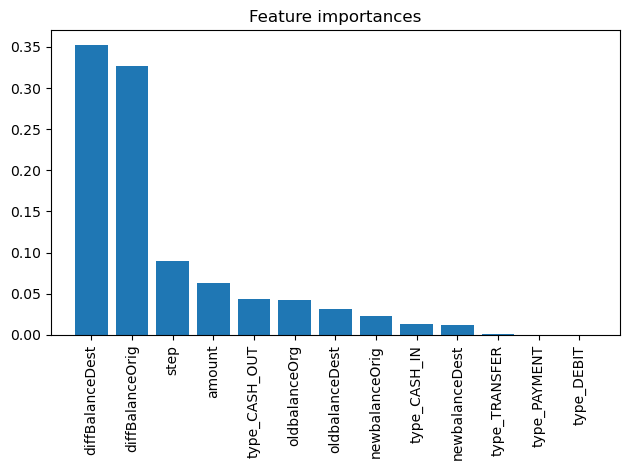

In [129]:
# Plot feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [130]:
#Create a Decision Tree model to make predictions

new_dt = DecisionTreeClassifier(criterion='gini',
                                max_features='sqrt',
                                max_depth=50,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                random_state=42)

new_dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [131]:
#Making prediction with Decision Tree model

y_pred_dt = new_dt.predict(X_test_scaled)

In [132]:
#Printing confusion matrix

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19973
           1       0.43      0.85      0.57        27

    accuracy                           1.00     20000
   macro avg       0.71      0.93      0.78     20000
weighted avg       1.00      1.00      1.00     20000



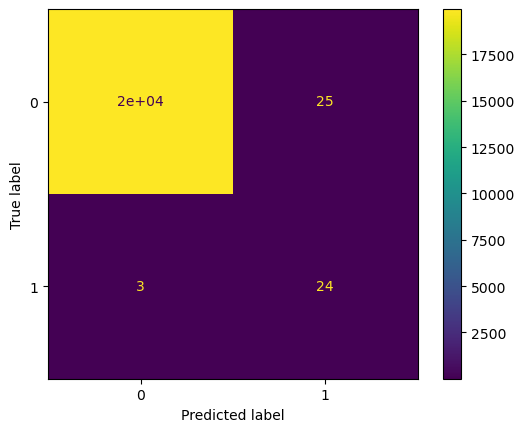

In [133]:
# Confusion matrix for Decision Tree

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=[0, 1])
disp_dt.plot()
plt.show();

### Comparing Results for All Models and Results Visualisation

In [134]:
#import the techniques that will be used to evaluate all models

from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [137]:
#Creating a results histogram for all models

ai_models = ['MLP', 'CNN', 'LSTM', 'Random Forest', 'SVM', 'Decision Tree']
prediction = [y_pred_MLP, y_pred_CNN, y_pred_LSTM, y_pred_random, y_pred_svm, y_pred_dt]

In [138]:
#Setting a threshold of 0.5 because it is a binary classification problem

threshold = 0.5
prediction = [np.where(pred >= threshold, 1, 0) for pred in prediction]

In [140]:
#Getting error metrics (accuracy, precision, recall, f1 score, auc) for all models

accuracy_all = []
precision_all = []
recall_all =[]
f1_all = []
auc_all = []
for x in range(0, len(prediction)):
    acc_score = np.round(accuracy_score(y_test, prediction[x]) * 100, 2)
    accuracy_all.append(acc_score)
    pre_score = np.round(precision_score(y_test, prediction[x], average='weighted') * 100, 2)
    precision_all.append(pre_score)
    rc_score = np.round(recall_score(y_test, prediction[x], average='weighted') * 100, 2)
    recall_all.append(rc_score)
    f_score = np.round(f1_score(y_test, prediction[x], average='weighted') * 100, 2)
    f1_all.append(f_score)
    auc_sc = np.round(roc_auc_score(y_test, prediction[x]) * 100, 2)
    auc_all.append(auc_sc)

In [141]:
#Showing results for every model

model_perform  = {'AI Models':ai_models,
              'Accuracy':accuracy_all,
               'Precision':precision_all,
               'Recall':recall_all,
               'F1-Score':f1_all,     
               'AUC':auc_all
              }
model_data  = pd.DataFrame(model_perform)
print('Result of testing with Fraud Dataset')
model_data

Result of testing with Fraud Dataset


,AI Models,Accuracy,Precision,Recall,F1-Score,AUC
0,MLP,99.38,99.87,99.38,99.59,94.14
1,CNN,98.34,99.85,98.34,99.04,91.77
2,LSTM,99.31,99.88,99.31,99.55,95.96
3,Random Forest,99.86,99.92,99.86,99.88,94.38
4,SVM,97.98,99.87,97.98,98.86,97.14
5,Decision Tree,99.82,99.90,99.82,99.85,92.51


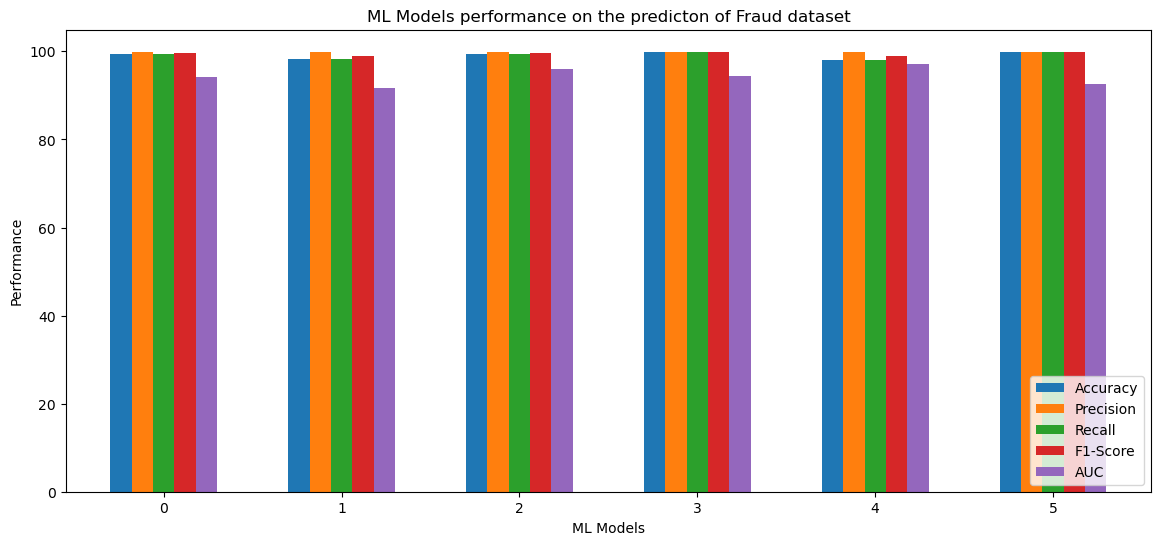

In [142]:
#Drawing final histogram that includes results for every model

model_all = model_data.set_index('AI Models')

model_data.plot(kind='bar', figsize=(14,6), width=0.6)
plt.title('ML Models performance on the predicton of Fraud dataset')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()